In [1]:
%cd /content/drive/MyDrive/NLP course/Assignment-1

/content/drive/MyDrive/NLP course/Assignment-1


In [2]:
import collections
from collections import Counter

In [3]:
import spacy
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import torch

In [4]:
%cd /content/drive/MyDrive/NLP course/Assignment-1/a1_data
file_names = ['books.txt','europarl.txt','wikipedia.txt']
encodings = ['ISO-8859-1','utf-8','utf-8']
base_dir = '/content/drive/MyDrive/NLP course/Assignment-1/a1_data/' 

/content/drive/MyDrive/NLP course/Assignment-1/a1_data


In [5]:
print('The books that we going to use in this data file are',file_names)

The books that we going to use in this data file are ['books.txt', 'europarl.txt', 'wikipedia.txt']


**1) Computing word frequencies**

To find the most common 10 words that are frequently occuring in the books. This can be done by using Counter and defaultdict, both in the standard package collections.  

In [6]:
for i in range(len(file_names)):
    freqs = Counter()
    file_name = file_names[i]
    encoding = encodings[i]
    with open(base_dir+file_name, encoding=encoding) as f:
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
    print('--------------' + file_name + '-------------')
    for word, freq in freqs.most_common(10):
        print(word + '\t' + str(freq))

--------------books.txt-------------
the	2425678
,	2064433
.	1958494
and	1367843
of	1321821
to	1159024
a	1103939
is	792900
in	739009
i	704436
--------------europarl.txt-------------
the	3003965
,	2115604
.	1536632
of	1422333
to	1341441
and	1158234
in	945160
that	732156
a	674231
is	671969
--------------wikipedia.txt-------------
the	3158463
,	2566261
.	1956600
of	1534698
and	1260516
in	1205759
a	958283
to	926287
-	548244
is	522101


**Result**- From the above result. It is obvious that the words like 'The','comma(,)','dot(.)','and','to' are the most commom words that are occuring mostly in the all 3 books as the top 5 words.

Most common words following "red"
books.txt:	sox	198
('sox', 'herrings', ',', 'army', 'and', 'riding', 'wine', 'october', 'cross', '"', 'lily', 'hat', 'book', '.', 'hair', 'herring', 'light', 'tape', 'dragon', 'meat', 'harvest', 'hen', 'flags', 'china', 'is', 'badge', 'flag', 'devil', 'sea', 'scare', 'in', 'line', 'ink', 'queen', 'squads', 'states', 'planet', 'onion', 'pony', 'haired', 'pepper', 'pine', 'hats', 'mars', 'or', 'baron', 'barn', 'with', 'star', 'ribbon')
europarl.txt:	tape	856
('tape', 'cross', 'card', 'lines', 'and', 'army', 'light', 'line', ',', '.', 'sludge', 'wine', 'crescent', 'meat', 'carpet', 'flag', 'lights', 'or', 'mud', 'herring', 'mosque', 'list', 'thread', 'book', 'traffic', 'herrings', 'alert', 'sea', 'brigades', 'coral', 'fruit', 'rag', 'squirrel', 'diesel', "''", 'flags', 'letter', 'cards', 'tuna', 'fruits', 'signal', 'to', 't-shirts', 'in', 'area', 'plastic', 'ensign', 'plus', 'but', 'grapes')
wikipedia.txt:	,	532
(',', 'sox', 'and', '-', 'army', 'cross', '

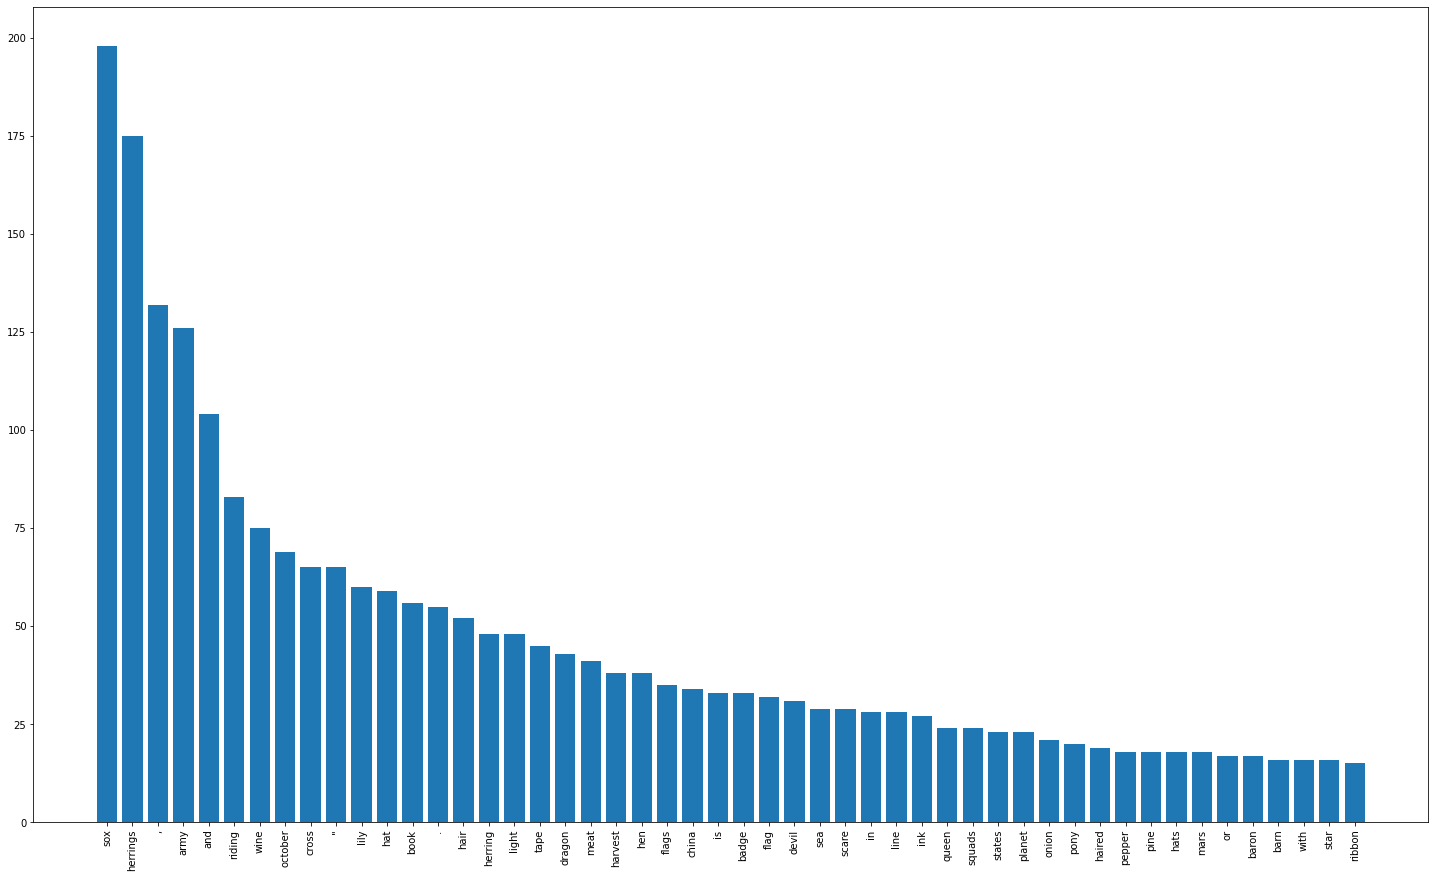

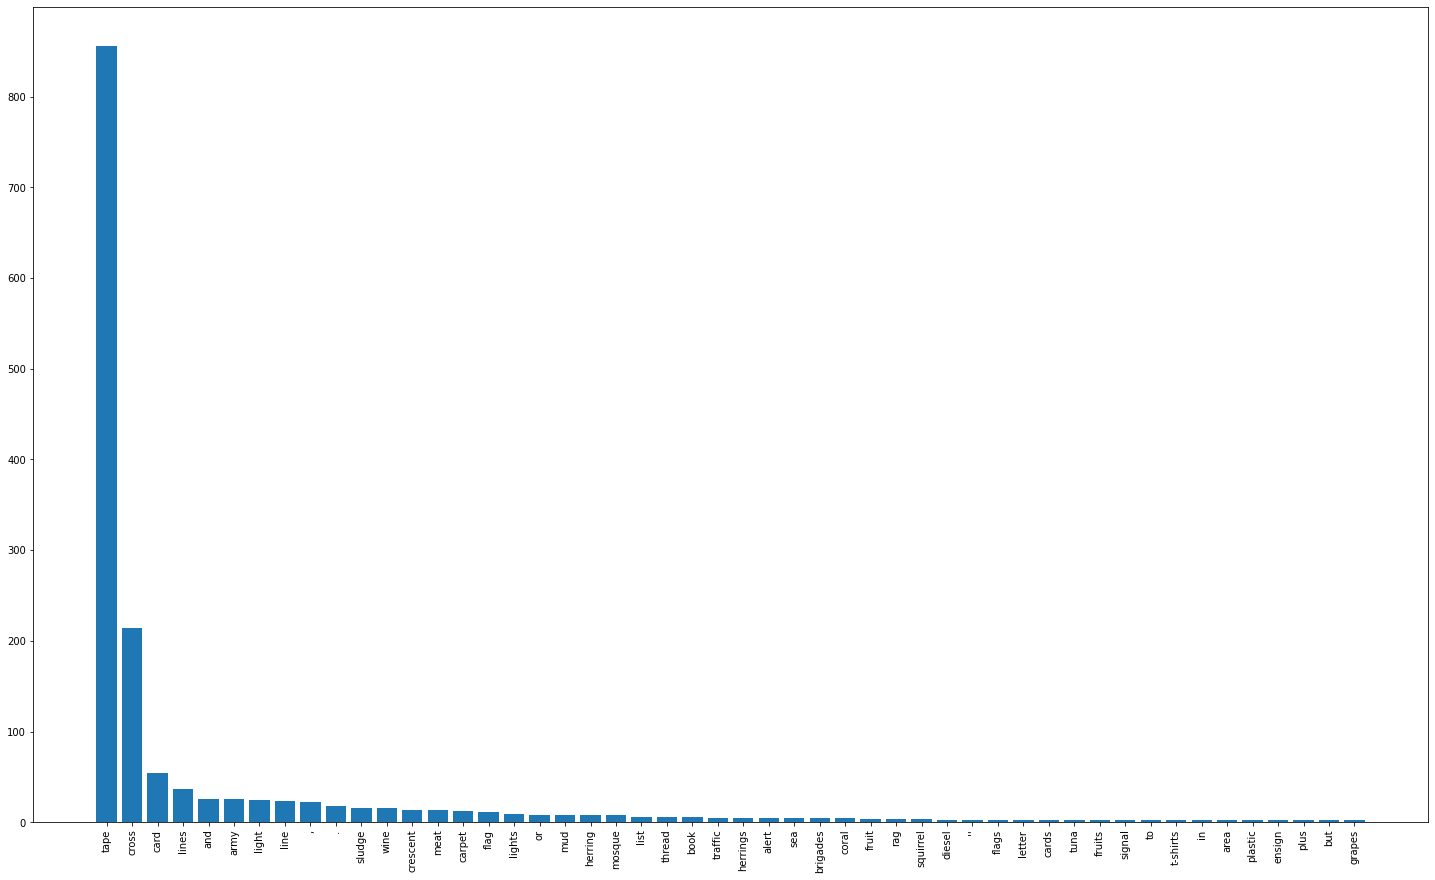

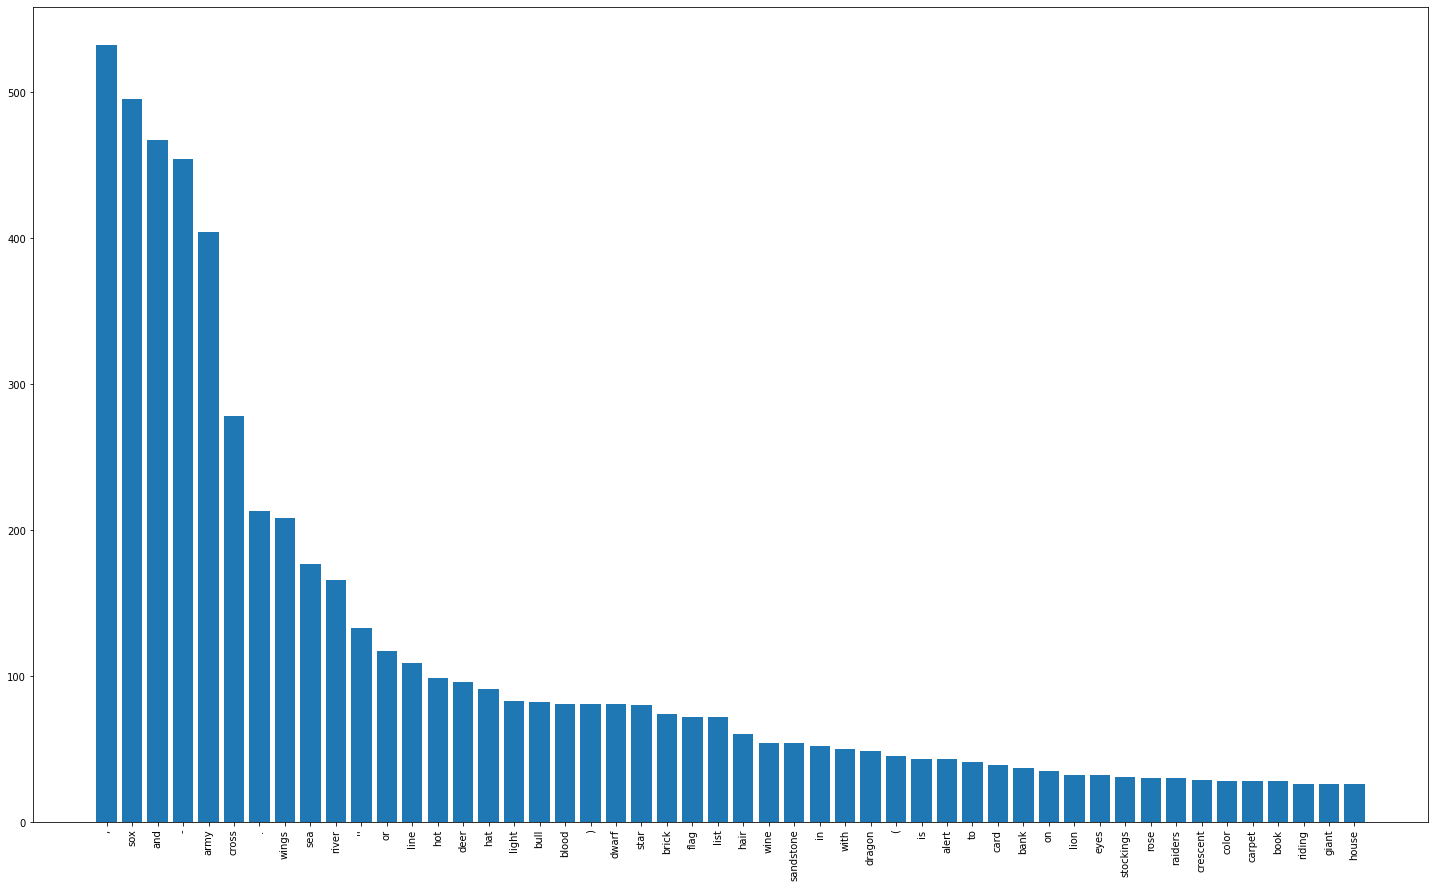

In [ ]:
print('Most common words following "red"')
for i in range(len(file_names)):
    file_name = file_names[i]
    encoding = encodings[i]
    freqs = defaultdict(Counter)
    with open(base_dir+file_name, encoding=encoding) as f:
        for line in f:
            tokens = line.lower().split()
            for t1, t2 in zip(tokens, tokens[1:]):
                freqs[t1][t2] += 1
    word = freqs['red'].most_common(1)[0][0]
    freq = freqs['red'].most_common(1)[0][1]
    print(file_name + ':\t' + word + '\t' + str(freq))

    import numpy as np
    x=(freqs['red'].most_common(50))
    
    ppx, ppy = zip(*x)
    plt.figure(figsize=(25,15))

    plt.bar(ppx,ppy, align='center')
    plt.xticks(rotation=90)
    print(ppx)

From the above bar plot, we have ploted the words which follow up the word **"Red"**. We can clearly see that some words like Sox, comma(,), the , army,cross, etc are occured moslty following the word **red** in all the 3 documents. 

[(',', 532), ('sox', 495), ('and', 467), ('-', 454), ('army', 404), ('cross', 278), ('.', 213), ('wings', 208), ('sea', 177), ('river', 166)]


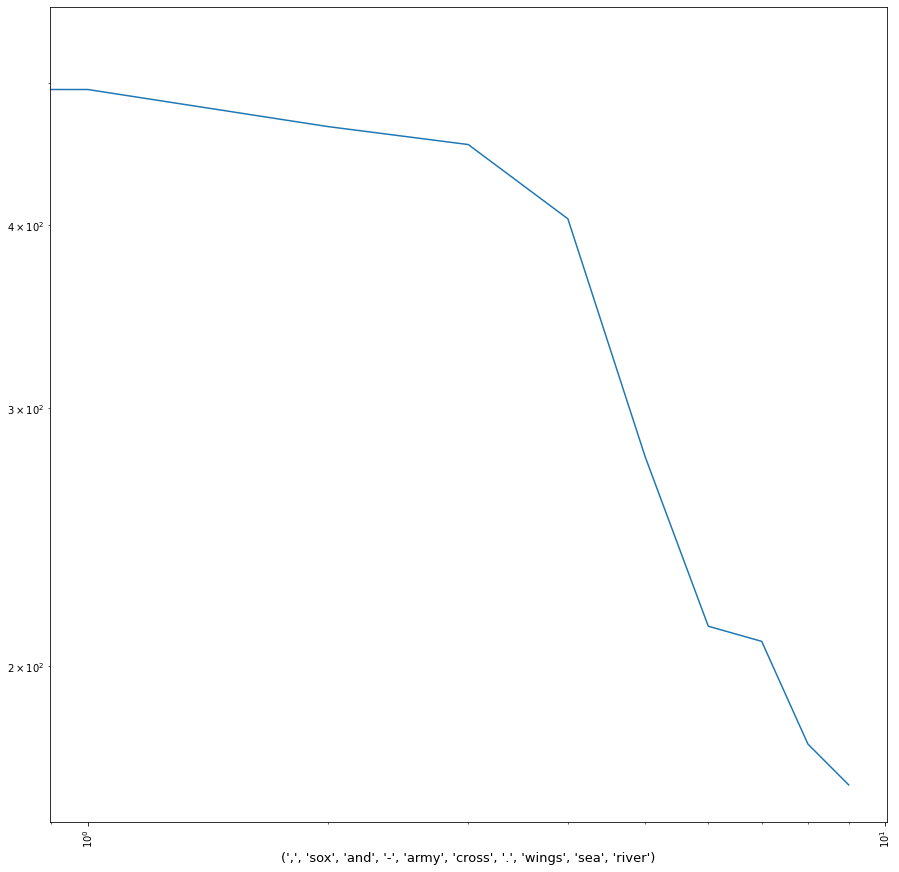

In [ ]:
import numpy as np
x=(freqs['red'].most_common(10))
print(x)
ppx, ppy = zip(*x)
plt.figure(figsize=(15,15))
xx=list(range(len(x)))

plt.loglog(list(xx),ppy)

#plt.xticks(xx,list(ppx))
plt.xticks(rotation=90)
plt.xlabel((ppx), fontsize=13)
plt.show()

 
**2) Comparing corpous**

In [11]:
# 'books.txt'
freqs1 = Counter()
with open(base_dir+file_names[0], encoding=encodings[0]) as f:
    for line in f:
    	tokens = line.lower().split()
    	for token in tokens:
    	    freqs1[token] += 1
# 'europarl.txt'
freqs2 = Counter()
with open(base_dir+file_names[1], encoding=encodings[1]) as f2:
    for line2 in f2:
    	tokens2 = line2.lower().split()
    	for token2 in tokens2:
    	    freqs2[token2] += 1

word1=[]
for word, freq1 in freqs1.most_common(100):
  word1.append(word)

word2=[]
for word, freq2 in freqs2.most_common(100):
  word2.append(word)

w=set(word1)-set(word2)

w1=set(word2)-set(word1)
print('Words that are not present in the corpous europarl.txt when comparing with the corpous books.txt')
print(w)
print('---------------------------------------------------------------------------------------------------------')
print('Words that are not present in the corpous books.txt when comparing with the corpous europarl.txt')
print(w1)

Words that are not present in the corpous europarl.txt when comparing with the corpous books.txt
{'book', 'how', 'good', 'life', 'me', 'even', 'had', 'them', 'books', 'story', 'many', 'she', 'most', 'first', '!', '"', 'some', 'were', '-', 'much', 'than', 'read', 'great', 'into', 'his', 'does', 'he', 'her', "n't", 'well', 'your', "'", 'just', 'reading'}
---------------------------------------------------------------------------------------------------------
Words that are not present in the corpous books.txt when comparing with the corpous europarl.txt
{'should', 'states', 'commission', 'therefore', 'our', 'now', 'union', 'policy', 'eu', 'those', 'report', '--', 'between', 'europe', 'however', 'us', 'new', 'council', 'must', 'rights', 'mr', 'european', 'member', 'need', 'important', 'countries', 'take', 'support', 'such', 'president', 'am', 'because', 'its', 'parliament'}


From the above example, we can see the first output gives the words that are not in the corpous europarl and present in the corpous book. we can clearly see that some of the words like story, life, good, etc. are present in the book corpous which we typically can't see in the europarl corpous because the europarl corpous moslty consist of the words from political side which we can clearly see from the second output which contains the words like commission, policy, union concil etc, which we can typically see in the book corpous.   

**Output need to be discussed**

**3) Preprocessing text for machine learning**

In [ ]:
class Vocab:
    def __init__(self, dataset, max_voc_size=1000, batch_size=1000):
        ############# word-to-int mapping #############
        self.dataset = dataset
        self.max_voc_size = max_voc_size
        freqs = Counter()
        tokens = dataset.lower().split()
        for token in tokens:
            freqs[token] += 1
        # freqs is dict(), i.e. freqs[word] = count
        if len(freqs) > max_voc_size:
            voc_size = max_voc_size
        else:
            voc_size = len(freqs)
        freqs = freqs.most_common(voc_size)
        # now freqs is tuple of (word, count)
        mapping = {freqs[i][0]:i+1 for i in range(voc_size)}
        # now freqs is dict of freqs[word]=r where r=rank based on frequency, r=(1,...)
        self.mapping = mapping # should use self.mapping.get('key',-1) to try non-existent keys

        
        ############# batching #####################
        split_dataset = dataset.split('\n')
        if len(split_dataset) > batch_size:
            split_dataset = split_dataset[:batch_size]
        else:
            batch_size = len(split_dataset)

        max_line_length = len(max(split_dataset, key=len))
        batches = torch.ones(max_line_length, batch_size) * -1 # -1 is the padding
        for line_idx in range(len(split_dataset)):
            line = split_dataset[line_idx]
            split_line = line.split()
            for word_idx in range(len(split_line)):
                batches[word_idx][line_idx] = mapping.get(split_line[word_idx], 0) # 0 is what words not in the mapping map to
        self.batches = batches
            
        
i = 0
max_voc_size=1000
batch_size=1000
with open(base_dir+file_names[i], encoding=encodings[i]) as f:
    dataset = f.read()
    
vc = Vocab(dataset, max_voc_size)
print(vc.mapping)
print(vc.batches)

{'the': 1, ',': 2, '.': 3, 'and': 4, 'of': 5, 'to': 6, 'a': 7, 'is': 8, 'in': 9, 'i': 10, 'this': 11, 'it': 12, 'that': 13, 'book': 14, '"': 15, 'for': 16, "'s": 17, 'as': 18, 'with': 19, 'you': 20, 'was': 21, 'on': 22, 'are': 23, 'but': 24, 'not': 25, 'his': 26, 'have': 27, 'he': 28, 'be': 29, 'one': 30, 'an': 31, 'read': 32, ')': 33, 'by': 34, '(': 35, 'from': 36, 'all': 37, 'about': 38, "n't": 39, 'or': 40, 'at': 41, 'who': 42, 'my': 43, 'has': 44, 'her': 45, 'what': 46, '-': 47, 'if': 48, 'more': 49, 'so': 50, 'they': 51, '!': 52, 'do': 53, 'there': 54, 'will': 55, 'how': 56, 'very': 57, 'like': 58, 'their': 59, 'would': 60, 'can': 61, 'some': 62, 'she': 63, 'we': 64, 'out': 65, 'which': 66, 'when': 67, 'me': 68, 'just': 69, "'": 70, 'great': 71, 'story': 72, 'many': 73, 'good': 74, 'time': 75, 'other': 76, 'life': 77, 'books': 78, 'into': 79, 'also': 80, 'had': 81, 'up': 82, 'your': 83, 'only': 84, 'most': 85, ':': 86, 'well': 87, 'than': 88, '?': 89, 'people': 90, 'first': 91, 'm

From the preprocessed text output, in the step 1, we have encoded a integers to the words in text file and we have used a batch size of 1000 so that the 1000 words has been encoded in the word file. 

**4) Trying out the NLP toolkit**

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
example = 'Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.'
result = nlp(example)
(result)

Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.

In [ ]:
# Part-of-speech tagging: labeling each token with a part-of-speech tag (noun, verb etc.)
from spacy import displacy
displacy.render(result, style='ent', jupyter=True)

In [ ]:
# Dependency parsing: determining grammatical relations between the tokens in the sentence (subject, object etc.)
from spacy import displacy
displacy.render(result, style='dep', jupyter=True)

In [ ]:
result

Apple bought two companies this year and no one knew, Mark Gurman at 9to5Mac reports.

In [ ]:
for token in result:
    print('Text of the token:',token.text,)
    print('Text of the token:',token.pos_)
    print('Uninflected base form;',token.lemma_)
    print('Parent token:',token.head)
    print('The label:',token.dep_)
    print('--------')

Text of the token: Apple
Text of the token: PROPN
Uninflected base form; Apple
Parent token: bought
The label: nsubj
--------
Text of the token: bought
Text of the token: VERB
Uninflected base form; buy
Parent token: bought
The label: ROOT
--------
Text of the token: two
Text of the token: NUM
Uninflected base form; two
Parent token: companies
The label: nummod
--------
Text of the token: companies
Text of the token: NOUN
Uninflected base form; company
Parent token: bought
The label: dobj
--------
Text of the token: this
Text of the token: DET
Uninflected base form; this
Parent token: year
The label: det
--------
Text of the token: year
Text of the token: NOUN
Uninflected base form; year
Parent token: bought
The label: npadvmod
--------
Text of the token: and
Text of the token: CCONJ
Uninflected base form; and
Parent token: bought
The label: cc
--------
Text of the token: no
Text of the token: DET
Uninflected base form; no
Parent token: one
The label: det
--------
Text of the token: on

In [ ]:
for entity in result.ents:
    print(entity.text)
    print(entity.label_)
    print('------')

Apple
ORG
------
two
CARDINAL
------
this year
DATE
------
Mark Gurman
PERSON
------
9to5Mac
CARDINAL
------
